# Student Activity: Portfolio Planner

## Part 1: Portfolio Optimization via Risk Evaluation

Harold has been asked to research the following ten stocks:

* Bank of New York Mellon (BK)
* Diamondback Energy (FANG)
* Johnson & Johnson (JNJ)
* Southwest Airlines Co (LUV)
* Micron Technologies (MU)
* Nike (NKE)
* Starbucks (SBUX)
* AT&T (T)
* Western Digital (WDC)
* Westrock (WRK)

Harold has been tasked with sorting stocks by risk/volatility, filtering out the top five stocks with the highest volatility and assigning the remaining stocks portfolio weights of 0.5, 0.2, 0.15, 0.10, and 0.05 (from least risk to most risk). He also needs to show the returns over time of a hypothetical $10,000 investment in such a portfolio.

Use the Pandas library to help Harold determine the risk profile of the ten stocks, filter out the top-five highly volatile stocks, assign portfolio weights to each corresponding stock, and plot the returns of a $10,000 investment in such a portfolio over time.

---

### Instructions - Part 1: Portfolio Optimization via Risk Evaluation

#### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

#### Read CSVs as DataFrames 

In [2]:
# Set the file paths
bk_data = Path("../Resources/bk_data.csv")
fang_data = Path("../Resources/fang_data.csv")
jnj_data = Path("../Resources/jnj_data.csv")
luv_data = Path("../Resources/luv_data.csv")
mu_data = Path("../Resources/mu_data.csv")
nke_data = Path("../Resources/nke_data.csv")
sbux_data = Path("../Resources/sbux_data.csv")
t_data = Path("../Resources/t_data.csv")
wdc_data = Path("../Resources/wdc_data.csv")
wrk_data = Path("../Resources/wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
wrk_df.head()

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


#### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new DataFrame where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df = combined_df.sort_index()

# Set column names
combined_df.columns = ["BK", "FANG", "JNJ", "LUV", "MU", "NKE", "SBUX", "T", "WDC", "WRK"]

# Display a few rows
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


#### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


#### Evaluate Riskiness of Stocks

In [5]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)

# Sort values in ascending order
volatility = volatility.sort_values()

# Display the values
volatility

T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370840
JNJ     0.370840
WDC     0.415605
MU      0.479955
dtype: float64

#### Drop High Volatility Stocks

In [6]:
# Drop the five stocks with the highest volatility in daily returns
daily_returns = daily_returns.drop(columns=["MU", "WDC", "JNJ", "FANG", "WRK"])
daily_returns.head()

,BK,LUV,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,0.004076,-0.009414,0.006703,0.011179
2015-06-26,0.003034,-0.004929,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.033217,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002712,0.003251,0.001214,-0.006989


#### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

Set weights for the corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return.

In [7]:
# Set weights for corresponding risk profile of stocks: BK, LUV, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]

# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
portfolio_returns = daily_returns.dot(weights)

# Diplay sample values
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.004668
2015-06-26    0.005681
2015-06-29   -0.016436
2015-06-30   -0.002416
dtype: float64

#### Calculate Cumulative Returns

In [8]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Display sample values
cumulative_returns.head()

date
2015-06-24         NaN
2015-06-25    1.004668
2015-06-26    1.010376
2015-06-29    0.993769
2015-06-30    0.991368
dtype: float64

#### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<AxesSubplot:xlabel='date'>

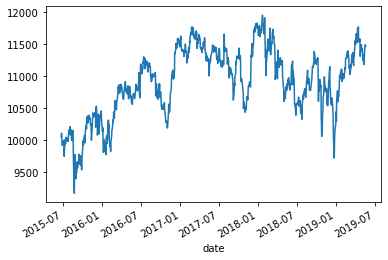

In [9]:
# Set initial investment
initial_investment = 10000

# Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

# Plot the returns of the investment
cumulative_profit.plot()